3864       0.100087
3865       0.102794
3866       0.104428
3867       0.107139
3868       0.115762
             ...   
3258002    0.406787
3258003    0.405283
3258004    0.403272
3258005    0.401286
3258006    0.397431
Length: 845316, dtype: float64
0 보다 작은값  0
117       -7.776078e-06
166       -4.377216e-08
244       -2.258690e-06
249       -2.205186e-05
257       -8.244999e-06
               ...     
3259492   -2.304682e-02
3259495   -2.523447e-02
3259497   -2.666724e-02
3259499   -2.597164e-02
3259501   -2.824642e-02
Name: nvme_sq, Length: 547854, dtype: float64


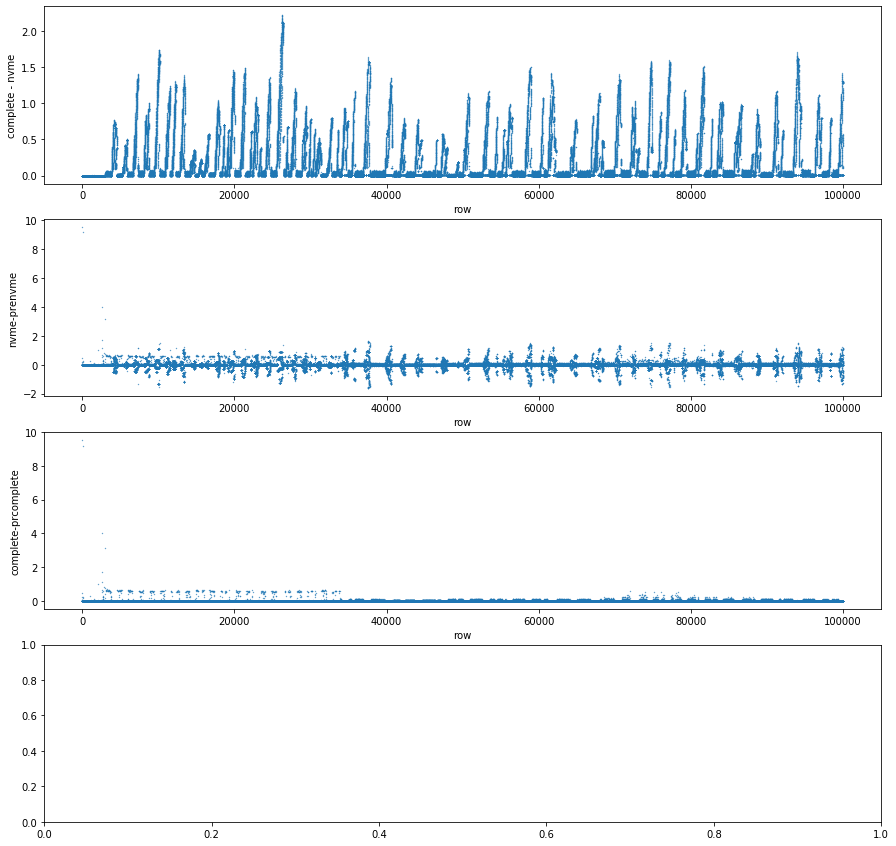

             Sector  block_bio_queue   block_getrq       nvme_sq  \
0        1875669881     1.560319e+06  1.560319e+06  1.560319e+06   
2        2813063688     1.560328e+06  1.560328e+06  1.560328e+06   
3        2813064152     1.560328e+06  1.560328e+06  1.560328e+06   
4            699464     1.560329e+06  1.560329e+06  1.560329e+06   
5        2816608784     1.560329e+06  1.560329e+06  1.560329e+06   
...             ...              ...           ...           ...   
3259532  1846774016     1.573942e+06  1.573942e+06  1.573942e+06   
3259533  1846774272     1.573942e+06  1.573942e+06  1.573942e+06   
3259534  1846774528     1.573942e+06  1.573942e+06  1.573942e+06   
3259535  1846774784     1.573942e+06  1.573942e+06  1.573942e+06   
3259536  1846775040     1.573942e+06  1.573942e+06  1.573942e+06   

         block_rq_complete  
0             1.560319e+06  
2             1.560328e+06  
3             1.560328e+06  
4             1.560329e+06  
5             1.560329e+06  
...      

In [3]:
'''
작성일 : 2020-09-10
작성자 : 정성모
코드 개요 :
    complete-nvme, nvme-prenvme, complete-precomplete 한 데이터 확인
'''

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, utils
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

def main():
    data = pd.read_csv("C:/Users/jsm97/Desktop/raw193.csv")
    data = data.copy()
    data = data[data['block_rq_complete']!=0]
    data = data[data['block_getrq']!=0]
    data = data[data['Sector']!=0]
    data.pop('Size of IO')
    data.pop('streamid')
    complet_nvme = data['block_rq_complete'] - data['nvme_sq']
    print(complet_nvme[complet_nvme > 0.1])
    
    data_nv = data['nvme_sq']
    data_nv = data_nv[115:118]
    data_complete = data['block_rq_complete']
    data_complete = data_complete[:500000]
    
    data1 = data.copy()
    data2 = nvme_preprocessing(data1)
    data3 = complete_preprocessing(data1)
    print("0 보다 작은값 ",len(data3[data3['block_rq_complete']<0]))
    precomplete = data3['block_rq_complete']
    prenvme = data2['nvme_sq']
    print(prenvme[prenvme < 0])
    
    plt.figure(figsize=(15,15))
    #plt.scatter(data_nv,data_complete,s=0.1)
    plt.subplot(4,1,1)
    plt.xlabel('row')
    plt.ylabel('complete - nvme')
    plt.scatter(range(100000),complet_nvme[:100000],s=0.1)
    plt.subplot(4,1,2)
    plt.xlabel('row')
    plt.ylabel('nvme-prenvme')
    plt.scatter(range(100000),prenvme[:100000],s=0.1)
    plt.subplot(4,1,3)
    plt.ylabel('complete-prcomplete')
    plt.xlabel('row')
    plt.scatter(range(100000),precomplete[:100000],s=0.1)
    plt.show()

def nvme_preprocessing(x):
    '''
    함수 개요 :
        현재 row - 이전 row 값을 현재 row로 변경, 마지막에 0번째 row의 값을 0으로 변경
    파라미터 :
        data = pandas DataFrame 형태의 데이터
    '''
    data = np.array(x['nvme_sq'])
    temp = np.zeros(len(data))
    for i in range(len(data)):
            temp[i] = data[i] - data[i-1]
    temp[0] = 0.
    x['nvme_sq'] = temp

    return x

def complete_preprocessing(x):
    '''
    함수 개요 :
        현재 row - 이전 row 값을 현재 row로 변경, 마지막에 0번째 row의 값을 0으로 변경
    파라미터 :
        data = pandas DataFrame 형태의 데이터
    '''
    data = np.array(x['block_rq_complete'])
    temp = np.zeros(len(data))
    for i in range(len(data)):
            temp[i] = data[i] - data[i-1]
    temp[0] = 0.
    x['block_rq_complete'] = temp

    return x

main()

NameError: name 'data' is not defined

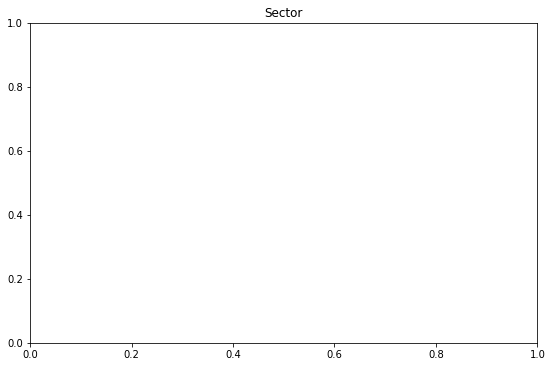

In [23]:
    plt.figure(figsize=(20,20))
    plt.subplot(3,2,1)
    plt.title("Sector")
    plt.plot(range(len(data)),complet_nvme)
    plt.subplot(3,2,2)
    plt.plot(range(len(data)),data['block_bio_queue'])
    plt.subplot(3,2,3)
    plt.plot(range(len(data)),data['block_getrq'])
    plt.subplot(3,2,4)
    plt.plot(range(len(data)),data['nvme_sq'])
    plt.subplot(3,2,5)
    plt.plot(range(len(data)),data['block_rq_complete'])